# Notebook for producing figures for the Solow model, and for simulating the Solow model

Nothing fancy, and self explanatory I hope.

### Python packages and settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

### Parameterization of the Solow model

In [2]:
s = 0.2
delta = 0.1
n = 0.01
alpha = 0.33
f = lambda k: k**alpha

### Investment/depreciation diagram

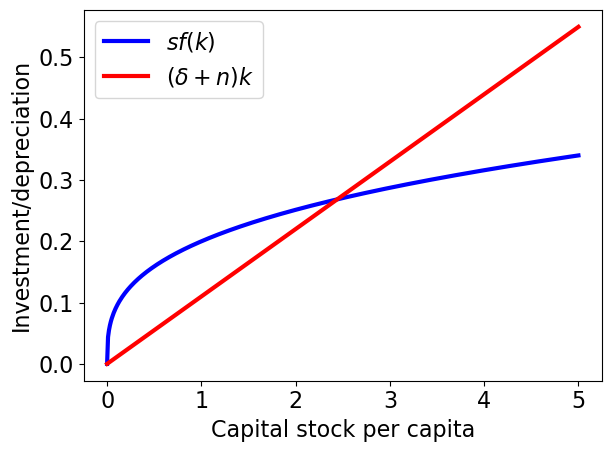

In [3]:
ks = np.linspace(0,5, 500)

plt.plot(ks, s*f(ks), color = 'blue', lw = 3, label ='$sf(k)$')
plt.plot(ks, (delta+n)*ks, color = 'red', lw = 3, label = '$(\delta+n)k$')
plt.xlabel('Capital stock per capita')
plt.ylabel('Investment/depreciation')
plt.legend()
plt.tight_layout()
plt.savefig('figures/solow_diagram.pdf')

## Dynamics after an increase in $s$

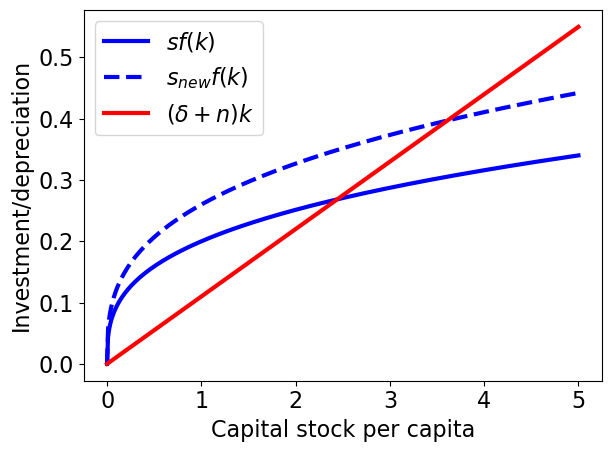

In [4]:
ks = np.linspace(0,5, 500)

s_new = 1.3*s

plt.plot(ks, s*f(ks), color = 'blue', lw = 3, label ='$sf(k)$')
plt.plot(ks, s_new*f(ks), color = 'blue', lw = 3, ls = '--', label ='$s_{new}f(k)$')
plt.plot(ks, (delta+n)*ks, color = 'red', lw = 3, label = '$(\delta+n)k$')
plt.xlabel('Capital stock per capita')
plt.ylabel('Investment/depreciation')
plt.legend()
plt.tight_layout()
plt.savefig('figures/solow_diagram_change.pdf')

### Dynamics after a change in the saving rate

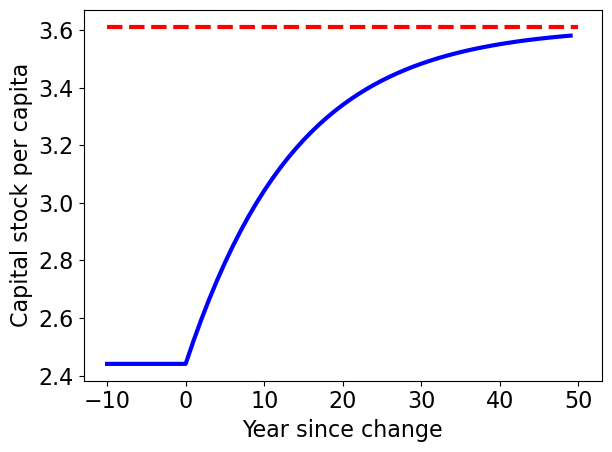

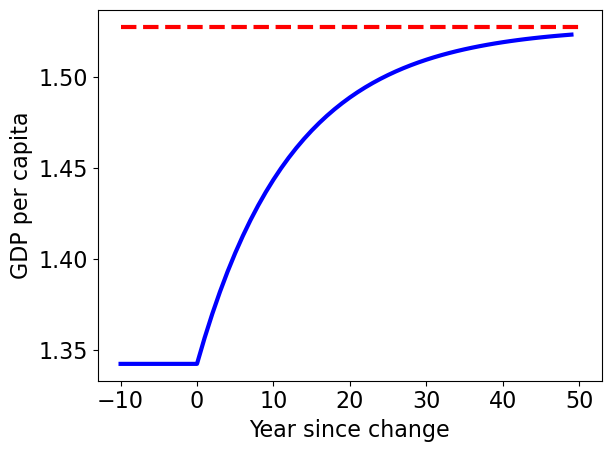

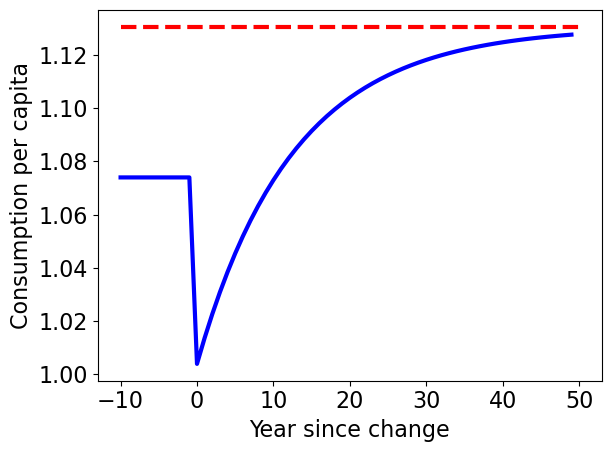

In [5]:
k = (s/(n+delta))**(1/(1-alpha))
k_list = []
c_list = []

for t in range(10):
    k_list.append(k)
    c = (1-s)*f(k)
    c_list.append(c)
    k = k + (1/(1+n))*(s*f(k)-(delta+n)*k)

for t in range(50):
    k_list.append(k)
    k = k + (1/(1+n))*(s_new*f(k)-(delta+n)*k)
    c = (1-s_new)*f(k)
    c_list.append(c)

k_list = np.array(k_list)

plt.plot(np.arange(-10,50), k_list, color = 'blue', lw = 3)
plt.xlabel('Year since change')
plt.ylabel('Capital stock per capita')
plt.plot([-10, 50], 
         [(s_new/(n+delta))**(1/(1-alpha)), (s_new/(n+delta))**(1/(1-alpha))],
        ls = '--', color = 'red', lw = 3)
plt.tight_layout()
plt.savefig('figures/capital_dynamics.pdf')
plt.show()

plt.plot(np.arange(-10,50), k_list**alpha, color = 'blue', lw = 3)
plt.xlabel('Year since change')
plt.ylabel('GDP per capita')
plt.plot([-10, 50], 
         [(s_new/(n+delta))**(alpha/(1-alpha)), (s_new/(n+delta))**(alpha/(1-alpha))],
        ls = '--', color = 'red', lw = 3)
plt.tight_layout()
plt.savefig('figures/GDP_dynamics.pdf')
plt.show()

plt.plot(np.arange(-10,50), c_list, color = 'blue', lw = 3)
plt.xlabel('Year since change')
plt.ylabel('Consumption per capita')
plt.plot([-10, 50], 
         [ (1-s_new)*(s_new/(n+delta))**(alpha/(1-alpha)), (1-s_new)*(s_new/(n+delta))**(alpha/(1-alpha))],
        ls = '--', color = 'red', lw = 3)
plt.tight_layout()
plt.savefig('figures/consumption_dynamics.pdf')
plt.show()